In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [7]:
dates = pd.read_excel('C:/Users/korab/Desktop/data science/Git Projects/DFT_Group/Dates 2.xlsx')

In [8]:
dates

,Date,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
0,2020-04-15,888,2,7,15,9,3,552,2,34,...,152,146,23,1,0,296,1,350,101,15
1,2020-04-16,964,2,7,16,9,3,615,2,35,...,160,163,24,1,0,352,2,365,102,15
2,2020-04-17,1007,2,7,16,11,3,631,2,35,...,163,177,24,1,0,372,2,384,116,15
3,2020-04-18,1063,2,7,16,11,3,648,2,36,...,172,187,24,1,0,382,2,396,125,15
4,2020-04-19,1114,2,7,16,12,3,685,2,36,...,180,206,25,1,0,397,2,416,126,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2020-07-27,10330,2,76,758,99,263,6933,87,513,...,2599,7861,637,189,3,8210,126,6392,1394,372
104,2020-07-28,10438,2,81,820,99,273,7073,87,513,...,2599,7994,647,189,3,8534,131,6392,1424,382
105,2020-07-29,10633,2,84,866,99,292,7304,88,555,...,2617,8228,670,214,3,8862,131,6830,1446,397
106,2020-07-30,10773,2,89,883,108,304,7714,88,589,...,2662,8492,731,219,4,9076,132,6997,1477,441


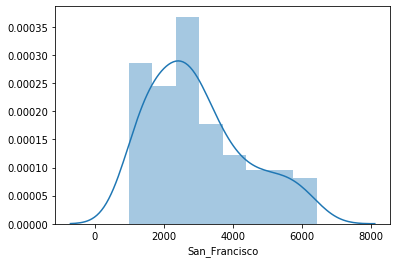

In [12]:
sns.distplot(dates['San_Francisco'])

In [10]:
print(dates.columns.values)

['Date' 'Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San_Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


In [16]:
datessum = dates.sum(axis=0)

In [17]:
datessum

Alameda             489095
Alpine                 214
Amador                2386
Butte                18715
Calaveras             3682
Colusa                5491
Contra Costa        269887
Del Norte             3970
El Dorado            17799
Fresno              411436
Glenn                 7654
Humboldt             11870
Imperial            399179
Inyo                  2752
Kern                431127
Kings               164163
Lake                  5446
Lassen               13823
Los Angeles        8086346
Madera               44463
Marin               157872
Mariposa              2110
Mendocino             7119
Merced               93667
Modoc                    4
Mono                  4693
Monterey            133605
Napa                 26753
Nevada                9835
Orange             1229575
Placer               57497
Plumas                 970
Riverside          1401230
Sacramento          306701
San Benito           19242
San Bernardino     1027124
San Diego          1166483
S

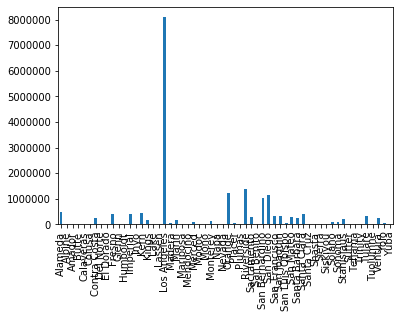

In [23]:
datessum.plot(kind = 'bar')

In [25]:
datessum.to_csv('C:/Users/korab/Desktop/data science/Git Projects/DFT_Group/DatesCountysum.csv')

# Is there a difference between homeless and the Settled population in terms of percentage cases of population? 

In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

### import data

In [32]:
SF = pd.read_csv('C:/Users/korab/Desktop/data science/Git Projects/DFT_Group/covid19_homeless_impact_WR2-python.csv')

In [33]:
SF

,county,date,cumulative_population_cases,rooms,rooms_occupied,trailers_requested,trailers_delivered,donated_trailers_delivered,cumulative_homeless_cases,total_homless_population_by_percentage,total_population_by_percentage
0,San Francisco,4/15/2020,987,1012,751,0,0,0,119,1.216271,0.111739
1,San Francisco,4/16/2020,1013,1271,748,0,0,0,120,1.226492,0.114683
2,San Francisco,4/17/2020,1019,1271,748,0,0,0,123,1.257155,0.115362
3,San Francisco,4/18/2020,1058,1271,710,0,0,0,123,1.257155,0.119777
4,San Francisco,4/19/2020,1137,1273,725,0,0,0,126,1.287817,0.128721
...,...,...,...,...,...,...,...,...,...,...,...
85,San Francisco,7/27/2020,5932,2468,1900,91,91,0,244,2.493868,0.671569
86,San Francisco,7/28/2020,6022,2614,1901,91,91,0,246,2.514309,0.681758
87,San Francisco,7/29/2020,6065,2614,1899,91,91,0,246,2.514309,0.686626
88,San Francisco,7/30/2020,6197,2614,1895,91,91,0,246,2.514309,0.701570


# Compute an independent t-test

## Testing assumptions

### Testing for Normality

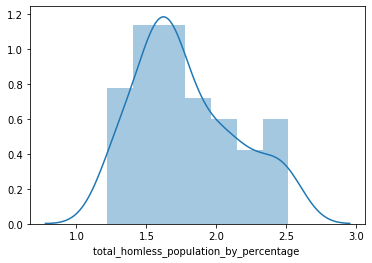

In [35]:
sns.distplot(SF['total_homless_population_by_percentage '])

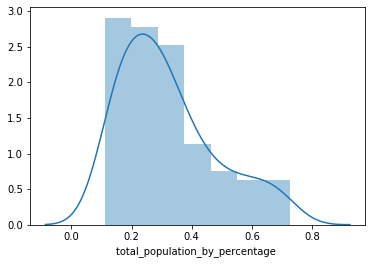

In [36]:
sns.distplot(SF['total_population_by_percentage '])

#### both variables are normally distributed

## Homogeneity of variance

### We will use the bartlett's test

In [39]:
scipy.stats.bartlett(SF['total_homless_population_by_percentage '], SF['total_population_by_percentage '])

BartlettResult(statistic=52.596933195046, pvalue=4.095282153292681e-13)

In [ ]:
### 

## Independent t-test

In [38]:
ttest_ind(SF['total_homless_population_by_percentage '], SF['total_population_by_percentage '])

Ttest_indResult(statistic=35.231976159075735, pvalue=3.6129652945153914e-82)

### Looks like there is a significant difference between  homeless and the Settled population in terms of percentage cases of population, since the p value is  less than .05. The t value is small, which is another good indication.

# Linear regression 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from statsmodels.stats.proportion import proportions_ztest

## Testing for Homoscedasticity

In [42]:
x = SF['total_homless_population_by_percentage ']
y = SF['total_population_by_percentage ']

In [44]:
SFmodel = sm.OLS(y,x).fit()

In [45]:
pred_val = SFmodel.fittedvalues.copy()
true_val = SF['total_population_by_percentage '].values.copy()
residual = true_val - pred_val

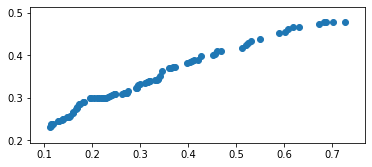

In [47]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(true_val, pred_val)

# One Proportional z-test

# qn is homeless popn 

In [7]:
count = 246
nobs = 6423
value = .
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

-109.28347190606428 0.0
